# **ML Major Project**
## **Earthquake Prediction**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data=pd.read_csv('/content/drive/My Drive/database.csv')
data1=data

### EDA Process & Feature Engineering

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

In [6]:
data.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [7]:
data.tail()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
23407,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,ML,...,18.0,42.47,0.120,NaN,0.1898,NN00570710,NN,NN,NN,Reviewed
23408,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,...,18.0,48.58,0.129,NaN,0.2187,NN00570744,NN,NN,NN,Reviewed
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,1.8,NaN,5.9,MWW,...,NaN,91.00,0.992,4.8,1.5200,US10007NAF,US,US,US,Reviewed
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,1.8,NaN,6.3,MWW,...,NaN,26.00,3.553,6.0,1.4300,US10007NL0,US,US,US,Reviewed
23411,12/30/2016,20:08:28,37.3973,141.4103,Earthquake,11.94,2.2,NaN,5.5,MB,...,428.0,97.00,0.681,4.5,0.9100,US10007NTD,US,US,US,Reviewed


In [8]:
data.shape

(23412, 21)

In [9]:
data.columns

Index(['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error',
       'Depth Seismic Stations', 'Magnitude', 'Magnitude Type',
       'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap',
       'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID',
       'Source', 'Location Source', 'Magnitude Source', 'Status'],
      dtype='object')

In [10]:
data.describe()

,Latitude,Longitude,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square
count,23412.000000,23412.000000,23412.000000,4461.000000,7097.000000,23412.000000,327.000000,2564.000000,7299.000000,1604.000000,1156.000000,17352.000000
mean,1.679033,39.639961,70.767911,4.993115,275.364098,5.882531,0.071820,48.944618,44.163532,3.992660,7.662759,1.022784
std,30.113183,125.511959,122.651898,4.875184,162.141631,0.423066,0.051466,62.943106,32.141486,5.377262,10.430396,0.188545
min,-77.080000,-179.997000,-1.100000,0.000000,0.000000,5.500000,0.000000,0.000000,0.000000,0.004505,0.085000,0.000000
25%,-18.653000,-76.349750,14.522500,1.800000,146.000000,5.600000,0.046000,10.000000,24.100000,0.968750,5.300000,0.900000
50%,-3.568500,103.982000,33.000000,3.500000,255.000000,5.700000,0.059000,28.000000,36.000000,2.319500,6.700000,1.000000
75%,26.190750,145.026250,54.000000,6.300000,384.000000,6.000000,0.075500,66.000000,54.000000,4.724500,8.100000,1.130000
max,86.005000,179.998000,700.000000,91.295000,934.000000,9.100000,0.410000,821.000000,360.000000,37.874000,99.000000,3.440000


*Finding Null Values*

In [11]:
data.isnull().sum()

Date                              0
Time                              0
Latitude                          0
Longitude                         0
Type                              0
Depth                             0
Depth Error                   18951
Depth Seismic Stations        16315
Magnitude                         0
Magnitude Type                    3
Magnitude Error               23085
Magnitude Seismic Stations    20848
Azimuthal Gap                 16113
Horizontal Distance           21808
Horizontal Error              22256
Root Mean Square               6060
ID                                0
Source                            0
Location Source                   0
Magnitude Source                  0
Status                            0
dtype: int64

 *Taking those features which are highly responsible for earthquake:*

In [12]:

data = data[['Latitude', 'Longitude', 'Depth', 'Magnitude','Depth Seismic Stations']]
data.head(10)

,Latitude,Longitude,Depth,Magnitude,Depth Seismic Stations
0,19.246,145.616,131.6,6.0,NaN
1,1.863,127.352,80.0,5.8,NaN
2,-20.579,-173.972,20.0,6.2,NaN
3,-59.076,-23.557,15.0,5.8,NaN
4,11.938,126.427,15.0,5.8,NaN
5,-13.405,166.629,35.0,6.7,NaN
6,27.357,87.867,20.0,5.9,NaN
7,-13.309,166.212,35.0,6.0,NaN
8,-56.452,-27.043,95.0,6.0,NaN
9,-24.563,178.487,565.0,5.8,NaN


In [13]:
data.describe()

,Latitude,Longitude,Depth,Magnitude,Depth Seismic Stations
count,23412.000000,23412.000000,23412.000000,23412.000000,7097.000000
mean,1.679033,39.639961,70.767911,5.882531,275.364098
std,30.113183,125.511959,122.651898,0.423066,162.141631
min,-77.080000,-179.997000,-1.100000,5.500000,0.000000
25%,-18.653000,-76.349750,14.522500,5.600000,146.000000
50%,-3.568500,103.982000,33.000000,5.700000,255.000000
75%,26.190750,145.026250,54.000000,6.000000,384.000000
max,86.005000,179.998000,700.000000,9.100000,934.000000


In [14]:
data.mean()

Latitude                    1.679033
Longitude                  39.639961
Depth                      70.767911
Magnitude                   5.882531
Depth Seismic Stations    275.364098
dtype: float64

In [15]:
df = data.fillna(data.mean())

In [16]:
df.isnull().sum()

Latitude                  0
Longitude                 0
Depth                     0
Magnitude                 0
Depth Seismic Stations    0
dtype: int64

*Visualization the correlation for every combinations of pair-wise feature*

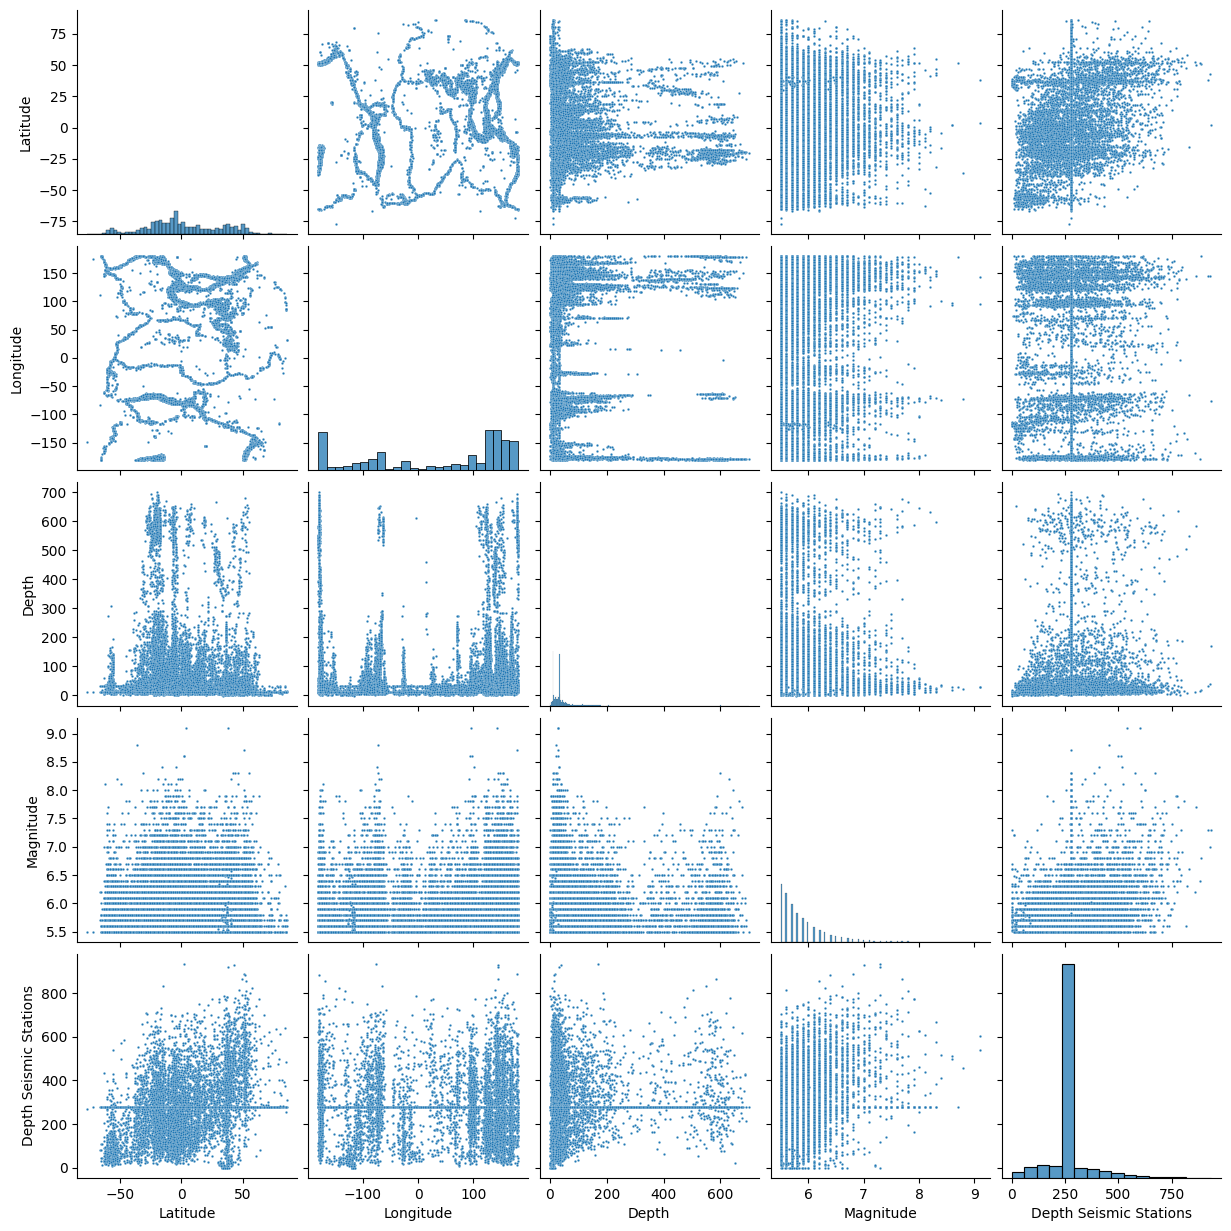

In [17]:

col = ["Latitude", "Longitude", "Depth", "Magnitude","Depth Seismic Stations"]

sns.pairplot(df[col], plot_kws={"s": 3})
plt.show()

In [18]:
cor_matrix = df.corr()

In [19]:
cor_matrix

,Latitude,Longitude,Depth,Magnitude,Depth Seismic Stations
Latitude,1.000000,0.203546,-0.081020,0.034987,0.233890
Longitude,0.203546,1.000000,-0.085861,0.038579,0.008675
Depth,-0.081020,-0.085861,1.000000,0.023457,0.096511
Magnitude,0.034987,0.038579,0.023457,1.000000,0.243923
Depth Seismic Stations,0.233890,0.008675,0.096511,0.243923,1.000000


*Visualizing correlation matrix using heat map*

<Axes: >

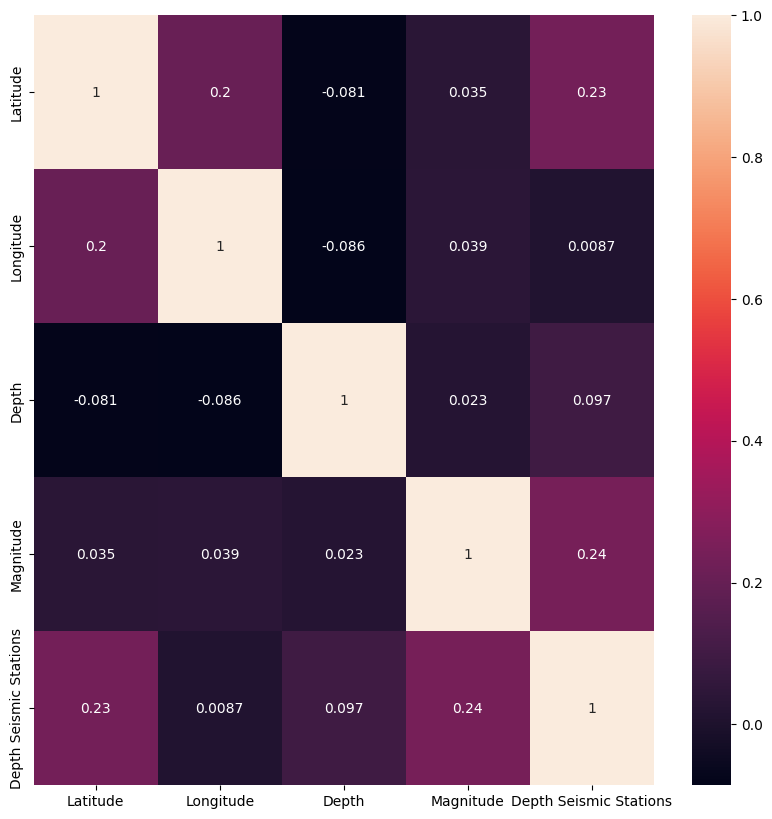

In [20]:

plt.figure(figsize = (10,10))
sns.heatmap(cor_matrix, annot = True)

# **VISUALISATION**

Here, all the earthquakes from the database in visualized on to the world map which shows clear representation of the locations where frequency of the earthquake will be more.

In [21]:
!pip3 install basemap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 860.7/860.7 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 36.9 MB/s eta 0:00:00


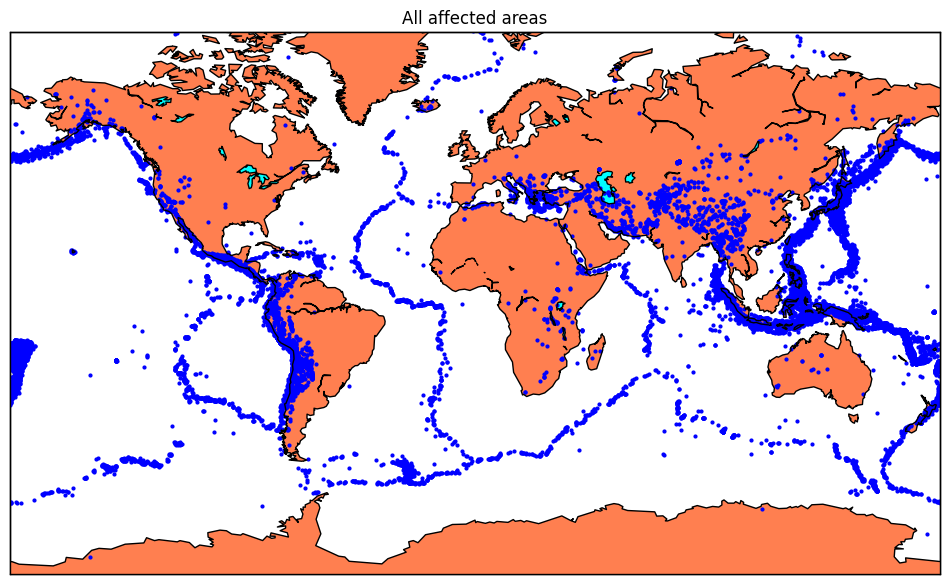

In [22]:
from mpl_toolkits.basemap import Basemap

m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')

longitudes = data["Longitude"].tolist()
latitudes = data["Latitude"].tolist()
#m = Basemap(width=12000000,height=9000000,projection='lcc',
            #resolution=None,lat_1=80.,lat_2=55,lat_0=80,lon_0=-107.)
x,y = m(longitudes,latitudes)

fig = plt.figure(figsize=(12,10))
plt.title("All affected areas")
m.plot(x, y, "o", markersize = 2, color = 'blue')
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
m.drawmapboundary()
plt.show()

# **Model Building**

# Splitting the Data

Firstly, split the data into Xs and ys which are input to the model and output of the model respectively. Here, inputs are TImestamp, Latitude and Longitude and outputs are Magnitude and Depth. Split the Xs and ys into train and test with validation. Training dataset contains 80% and Test dataset contains 20%

In [23]:
X = df[['Depth Seismic Stations', 'Latitude', 'Longitude']]
y = df[['Magnitude', 'Depth']]
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(18729, 3) (4683, 3) (18729, 2) (4683, 2)


In [24]:
X_train

,Depth Seismic Stations,Latitude,Longitude
18765,663.000000,14.944,-61.274
21035,474.000000,-14.438,-75.966
18334,514.000000,38.340,20.420
16776,503.000000,42.525,145.021
9152,275.364098,-15.864,-172.067
...,...,...,...
11964,275.364098,27.995,140.700
21575,346.000000,-10.682,166.381
5390,275.364098,-6.847,129.634
860,275.364098,-5.469,153.269


In [25]:
X_test

,Depth Seismic Stations,Latitude,Longitude
3848,275.364098,3.166,99.015
14008,275.364098,43.679,-29.020
16258,345.000000,1.142,98.911
18090,675.000000,38.649,15.390
15192,174.000000,38.457,31.351
...,...,...,...
15058,192.000000,-17.286,-175.176
18377,183.000000,-6.742,154.889
87,275.364098,36.405,70.724
10309,275.364098,-21.953,174.818


## Random Forest

In [26]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(random_state=42)
reg.fit(X_train, y_train)
y_pred=reg.predict(X_test)
y_pred

array([[  5.831 , 103.525 ],
       [  5.51  ,  12.933 ],
       [  5.743 ,  64.373 ],
       ...,
       [  6.043 , 208.341 ],
       [  6.146 ,  28.301 ],
       [  5.722 ,  24.5119]])

In [27]:
reg.score(X_test, y_test)

0.40999425426817104

In [28]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':[10, 20, 50, 100, 200, 500]}

grid_obj = GridSearchCV(reg, parameters)
grid_fit = grid_obj.fit(X_train, y_train)
best_fit = grid_fit.best_estimator_
y_pred=best_fit.predict(X_test)

In [29]:
best_fit.score(X_test, y_test)


0.41427301653694204

## Linear Regression

In [40]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import cross_val_score
model = LinearRegression()


model.fit(X_train,y_train)

y_pred = model.predict(X_test)
print(y_pred)
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)

accuracies

[[ 5.88997757 65.63340574]
 [ 5.85617498 58.48567243]
 [ 5.97443068 77.81386675]
 ...
 [ 5.87406008 54.92435068]
 [ 5.91038458 70.29123479]
 [ 5.87544582 89.17182932]]


array([0.05050964, 0.04878188, 0.03891571, 0.04153713, 0.0417668 ])

# **Neural Network model**

In the above case it was more kind of linear regressor where the predicted values are not as expected. So, Now, we build the neural network to fit the data for training set. Neural Network consists of three Dense layer with each 16, 16, 2 nodes and relu, relu and softmax as activation function.

In [41]:
from keras.models import Sequential
from keras.layers import Dense

def create_model(neurons, activation, optimizer, loss):
    model = Sequential()
    model.add(Dense(neurons, activation=activation, input_shape=(3,)))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(2, activation='softmax'))

    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

    return model

Using TensorFlow backend.

In this, we define the hyperparameters with two or more options to find the best fit

In [42]:
!pip install scikeras
from scikeras.wrappers import KerasClassifier

# from keras.wrappers.scikit_learn import KerasClassifier


# neurons = [16, 64, 128, 256]
neurons = [16]
# batch_size = [10, 20, 50, 100]
batch_size = [10]
epochs = [10]
# activation = ['relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear', 'exponential']
activation = ['sigmoid','relu']
# optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
optimizer = ['SGD', 'Adadelta']
loss = ['squared_hinge']

model = KerasClassifier(build_fn=create_model,  activation=activation,neurons=neurons, verbose=0)

param_grid = dict(neurons=neurons, batch_size=batch_size, epochs=epochs, activation=activation, optimizer=optimizer, loss=loss)



Here, we find the best fit of the above model and get the mean test score and standard deviation of the best fit model.

The best fit parameters are used for same model to compute the score with training data and testing data

In [43]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(3,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='SGD', loss='squared_hinge', metrics=['accuracy'])

In [44]:
model.fit(X_train, y_train, batch_size=10, epochs=20, verbose=1, validation_data=(X_test, y_test))

Epoch 1/20
1873/1873 [==============================] - 14s 7ms/step - loss: 0.2526 - accuracy: 0.5372 - val_loss: 0.0060 - val_accuracy: 0.2285
Epoch 2/20
1873/1873 [==============================] - 9s 5ms/step - loss: 0.0051 - accuracy: 0.5744 - val_loss: 0.0043 - val_accuracy: 0.0389
Epoch 3/20
1873/1873 [==============================] - 13s 7ms/step - loss: 0.0040 - accuracy: 0.8282 - val_loss: 0.0039 - val_accuracy: 0.9458
Epoch 4/20
1873/1873 [==============================] - 5s 3ms/step - loss: 0.0039 - accuracy: 0.8711 - val_loss: 0.0038 - val_accuracy: 0.9522
Epoch 5/20
1873/1873 [==============================] - 6s 3ms/step - loss: 0.0039 - accuracy: 0.7824 - val_loss: 0.0039 - val_accuracy: 0.9571
Epoch 6/20
1873/1873 [==============================] - 5s 3ms/step - loss: 0.0039 - accuracy: 0.9566 - val_loss: 0.0039 - val_accuracy: 0.9599
Epoch 7/20
1873/1873 [==============================] - 4s 2ms/step - loss: 0.0039 - accuracy: 0.9574 - val_loss: 0.0039 - val_accurac

In [45]:
[test_loss, test_acc] = model.evaluate(X_test, y_test)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

147/147 [==============================] - 0s 2ms/step - loss: 0.0039 - accuracy: 0.9678
Evaluation result on Test Data : Loss = 0.0038569970056414604, accuracy = 0.9677557349205017


We see that the above model performs better but it also has lot of noise (loss) which can be neglected for prediction and use it for furthur prediction.

The above model is saved for furthur prediction

In [46]:
model.save('earthquake.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
